In [1]:
import pandas as pd



In [ ]:
#PIAUCSL.csv - US CPI (inflation measure)
#RVRUSQ156N.csv - rental vacancy rate, quarterly
#ORTGAGE30US.csv - mortgage interest rates, weekly

fed_files = ["E:/Projects/House_Price_prediction_zellow/house_prices/MORTGAGE30US.csv" , "E:/Projects/House_Price_prediction_zellow/house_prices/RRVRUSQ156N.csv" , "E:/Projects/House_Price_prediction_zellow/house_prices/CPIAUCSL.csv" ]

dfs = [pd.read_csv(f , parse_dates = True, index_col = 0) for f in fed_files]


In [2]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [3]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [4]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [5]:
#So all our data sets are having different time lines

In [6]:
#So merged data sets
fed_data = pd.concat(dfs, axis=1)
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


In [7]:
#Missing values as there is difference in timeline
 

In [8]:
#For solving this issue we assume that RRV contant for a quater and CPIA is constant for a month
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,NaN,NaN
2022-04-28,5.10,NaN,NaN
2022-05-01,NaN,NaN,291.474
2022-05-05,5.27,NaN,NaN
2022-05-12,5.30,NaN,NaN
2022-05-19,5.25,NaN,NaN
2022-05-26,5.10,NaN,NaN
2022-06-01,NaN,NaN,295.328
2022-06-02,5.09,NaN,NaN


In [9]:
#So this we will do forward filling
fed_data = fed_data.ffill()

In [10]:
fed_data.tail(40)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-12-30,3.11,5.6,280.126
2022-01-01,3.11,5.8,281.933
2022-01-06,3.22,5.8,281.933
2022-01-13,3.45,5.8,281.933
2022-01-20,3.56,5.8,281.933
2022-01-27,3.55,5.8,281.933
2022-02-01,3.55,5.8,284.182
2022-02-03,3.55,5.8,284.182
2022-02-10,3.69,5.8,284.182


In [11]:
#1st file contains the data of meadian sale price of houses in USA per week
#2nd file contains zillow computed house values
zillow_files = ["E:/Projects/House_Price_prediction_zellow/house_prices/Metro_median_sale_price_uc_sfrcondo_week.csv" , "E:/Projects/House_Price_prediction_zellow/house_prices/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]


dfs = [pd.read_csv(f) for f in zillow_files ]

In [12]:
dfs[0].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0


In [13]:
dfs[1].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679


In [14]:
# we will now fetch the 1 row from both files, As we only want a data for united states not for specific region 

In [15]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [16]:
dfs[0]

,0
2008-02-02,190000.0
2008-02-09,190000.0
2008-02-16,193000.0
2008-02-23,189900.0
2008-03-01,194900.0
...,...
2022-06-11,370000.0
2022-06-18,375000.0
2022-06-25,370000.0
2022-07-02,370000.0


In [17]:
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


In [18]:
#For merging data as anagin they are in different time line
for df in dfs :
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [19]:
dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [20]:
dfs[1]

,0,month
1996-01-31,108641.264685,1996-01
1996-02-29,108472.72888,1996-02
1996-03-31,108532.280074,1996-03
1996-04-30,108739.077466,1996-04
1996-05-31,108986.621607,1996-05
...,...,...
2022-03-31,344042.433111,2022-03
2022-04-30,350515.841789,2022-04
2022-05-31,354717.722904,2022-05
2022-06-30,357473.327397,2022-06


In [21]:
# SO now we have common column which is month column which can serve as a common column to merge data sets

In [22]:
price_data = dfs[0].merge(dfs[1], on ="month")

In [23]:
price_data.index = dfs[0].index

In [24]:
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [25]:
price_data.drop(columns= 'month', inplace =True)

In [26]:
price_data.columns= ['Price', 'value']

In [27]:
price_data

,Price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [28]:
#Looking for missing values in fed data
fed_data.isnull().sum()

MORTGAGE30US    292
RRVRUSQ156N     108
CPIAUCSL          0
dtype: int64

In [29]:
#dropping missing values in fed data
fed_data = fed_data.dropna()

In [30]:
fed_data.isnull().sum()

MORTGAGE30US    0
RRVRUSQ156N     0
CPIAUCSL        0
dtype: int64

In [31]:
price_data.isnull().sum()

Price    0
value    0
dtype: int64

In [32]:
#For aligning fed data with zillow data as it has a 2 days of difference

In [33]:
from datetime import timedelta

fed_data.index= fed_data.index + timedelta(days=2)


In [34]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


In [35]:
price_data = fed_data.merge(price_data , left_index=True , right_index=True)

In [37]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


<Axes: >

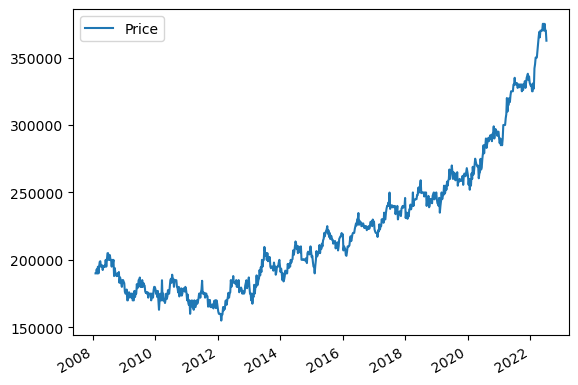

In [38]:
# Visualizing House prices , this may be because of inflation
price_data.plot.line( y = "Price", use_index = True)

In [39]:
# We want to take out inflation and just predict house prices

In [43]:
price_data["adj_price"] = price_data["Price"] /price_data["CPIAUCSL"] * 100 

<Axes: >

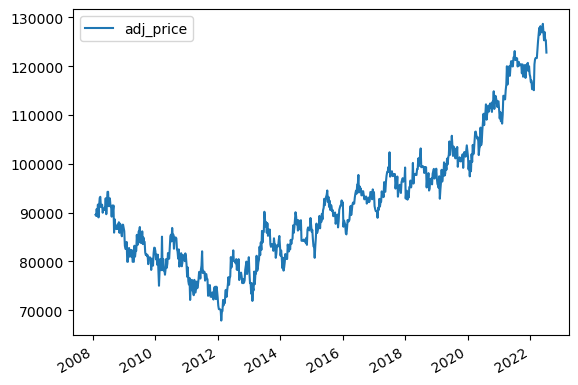

In [48]:
#visualinzing by taking inflation out of it, still arise in house prices over time
price_data.plot.line( y = "adj_price", use_index = True)

In [50]:
#Adjusting our value column as well due to inflation
price_data["adj_value"] = price_data["value"] /price_data["CPIAUCSL"] * 100 

In [52]:
price_data.head()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,value,adj_price,adj_value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254


In [54]:
#this is take data from 3 months from now , this is the adjusted price from that row 3 momnths from now
price_data["next_quater"] = price_data["adj_price"].shift(-13)

In [56]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,value,adj_price,adj_value,next_quater
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397,126977.462347,121042.815919,None
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636,125284.429516,120918.867035,None


In [57]:
#removing none values
price_data.dropna(inplace = True)

In [59]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,value,adj_price,adj_value,next_quater
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


In [66]:
#change column will indicate that if price goes up or down, we will the covert bool output to int as if price goes up=1, down=0
price_data["change"] = (price_data["next_quater"]>price_data["adj_price"]).astype(int)

In [81]:
# want to change column names
price_data.rename(columns={"MORTGAGE30US": "interest", "RRVRUSQ156N": "vacancy" , "CPIAUCSL": "cpi"}, inplace=True)

In [83]:
price_data

,interest,vacancy,cpi,Price,value,adj_price,adj_value,next_quater,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


In [84]:
#This show us that how many week does the price go up and down
price_data["change"].value_counts()

change
1    379
0    343
Name: count, dtype: int64

In [90]:
X= price_data[["interest" , "vacancy", "adj_price", "adj_value"]]

In [92]:
y =price_data["change"]

In [ ]:
#Logistic Regression 

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters for GridSearchCV
model = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100], 'penalty' : ["l1", "l2", "elasticnet", "None"],
    'solver' :["lbfgs","liblinear","newton-cg","newton-cholesky"]
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Generate classification report and accuracy
report = classification_report(y_test, y_pred)
print(report)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        74
           1       0.67      0.70      0.68        71

    accuracy                           0.68       145
   macro avg       0.68      0.68      0.68       145
weighted avg       0.68      0.68      0.68       145

Accuracy: 0.6827586206896552


C:\Users\shivo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
220 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shivo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shivo\anaconda3\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shivo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

In [86]:
#KNeighborsClassifier

In [99]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters for GridSearchCV
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use,
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

y_pred_t = best_model.predict(X_train_scaled)
# Generate classification report and accuracy
report = classification_report(y_test, y_pred)
print(report)

# Print accuracy
accuracy_t = accuracy_score(y_train, y_pred_t)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Accuracy t: {accuracy_t}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        92
           1       0.83      0.81      0.82        89

    accuracy                           0.82       181
   macro avg       0.82      0.82      0.82       181
weighted avg       0.82      0.82      0.82       181

Accuracy: 0.8232044198895028
Accuracy t: 0.9186691312384473


In [ ]:
#Random Forest classifier

In [108]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model and parameters for GridSearchCV
model = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion' : ["gini", "entropy"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

y_pred_t = best_model.predict(X_train_scaled)

# Generate classification report and accuracy
report = classification_report(y_test, y_pred)
print(report)

report_t = classification_report(y_train, y_pred_t)
print(report_t)

# Print accuracy
accuracy_t = accuracy_score(y_train, y_pred_t)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Accuracy t: {accuracy_t}")

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        74
           1       0.93      0.80      0.86        71

    accuracy                           0.88       145
   macro avg       0.88      0.87      0.87       145
weighted avg       0.88      0.88      0.88       145

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       269
           1       1.00      0.98      0.99       308

    accuracy                           0.99       577
   macro avg       0.99      0.99      0.99       577
weighted avg       0.99      0.99      0.99       577

Accuracy: 0.8758620689655172
Accuracy t: 0.9878682842287695
